In [1]:
from train_rnf import run_rnf
from baseline_compas import run_baseline
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
import numpy as np
import torch

Using device: cpu

Training RNF on COMPAS...
Epoch 1: loss=0.6582, acc=60.74
Epoch 2: loss=0.6141, acc=67.01
Epoch 3: loss=0.6128, acc=67.29
Epoch 4: loss=0.6068, acc=67.85
Epoch 5: loss=0.6042, acc=68.59
Epoch 6: loss=0.6059, acc=67.87
Epoch 7: loss=0.6037, acc=68.12
Epoch 8: loss=0.6020, acc=68.31
Epoch 9: loss=0.6032, acc=68.10
Epoch 10: loss=0.2768, acc=63.43
Epoch 11: loss=0.2731, acc=65.46
Epoch 12: loss=0.2724, acc=65.88
Epoch 13: loss=0.2714, acc=66.02

Final Results (RNF)
Accuracy: 0.6457883369330454
DP: 0.1677908740809896
EO: 0.22042601749714721
Positive rate: 0.22354211663066956
Using device: cpu

Training baseline MLP...
Epoch 1: acc=61.00
Epoch 2: acc=67.69
Epoch 3: acc=67.50
Epoch 4: acc=67.78
Epoch 5: acc=68.06
Epoch 6: acc=68.19
Epoch 7: acc=67.59
Epoch 8: acc=68.06
Epoch 9: acc=68.50

Final Results (Baseline)
Accuracy: 0.6760259179265659
DP: 0.23107947251721322
EO: 0.2453879802206162
Positive rate: 0.4200863930885529


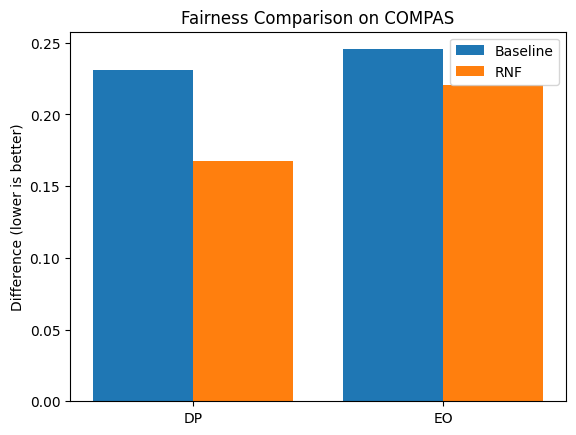

In [2]:
baseline_results = {
    "accuracy": 0.6760259179265659,
    "dp": 0.23107947251721322,
    "eo": 0.2453879802206162,
    "positive_rate": 0.4200863930885529
}

rnf_results = {
    "accuracy": 0.6457883369330454,
    "dp": 0.1677908740809896,
    "eo": 0.22042601749714721,
    "positive_rate": 0.22354211663066956
}

import matplotlib.pyplot as plt

metrics = ["dp", "eo"]
baseline_vals = [baseline_results[m] for m in metrics]
rnf_vals = [rnf_results[m] for m in metrics]

x = range(len(metrics))

plt.figure()
plt.bar(x, baseline_vals, width=0.4, label="Baseline")
plt.bar([i + 0.4 for i in x], rnf_vals, width=0.4, label="RNF")

plt.xticks([i + 0.2 for i in x], ["DP", "EO"])
plt.ylabel("Difference (lower is better)")
plt.title("Fairness Comparison on COMPAS")
plt.legend()
plt.show()


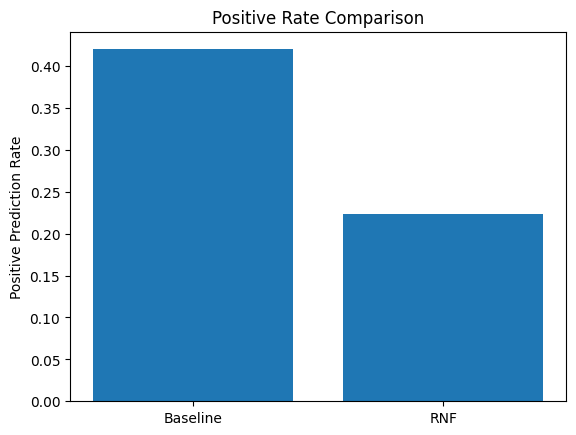

In [3]:
plt.figure()
plt.bar(["Baseline", "RNF"],
        [baseline_results["positive_rate"], rnf_results["positive_rate"]])

plt.ylabel("Positive Prediction Rate")
plt.title("Positive Rate Comparison")
plt.show()


In [4]:
import pandas as pd

df = pd.DataFrame.from_dict(
    {"Baseline": baseline_results, "RNF": rnf_results},
    orient="index"
)

df


,accuracy,dp,eo,positive_rate
Baseline,0.676026,0.231079,0.245388,0.420086
RNF,0.645788,0.167791,0.220426,0.223542
